In [461]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [462]:
path = r'C:\Users\wsaha\Documents\Hotel set'

In [463]:
#Import hotel data set with Latin -1 encoding

dfhotel = pd.read_csv(os.path.join(path, 'Data set', 'Prepared', 'Df_hotel_cleaned.csv'), encoding='latin-1')

In [464]:
#Cgecking the import

dfhotel.head()

,Unnamed: 0.1,Unnamed: 0,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,...,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
0,0,0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,...,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.25,243.000000,1944.0
1,1,1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,...,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.24,156.000000,156.0
2,2,2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,...,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.20,169.000000,1183.0
3,3,3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,...,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.13,127.000000,508.0
4,4,4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,...,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.17,104.333333,313.0


In [465]:
#Cgecking the import

dfhotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66536 entries, 0 to 66535
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               66536 non-null  int64  
 1   Unnamed: 0                 66536 non-null  int64  
 2   Booking ID                 66536 non-null  object 
 3   Date of Booking            66536 non-null  object 
 4   Time                       66536 non-null  object 
 5   Customer ID                66536 non-null  object 
 6   Gender                     66536 non-null  object 
 7   Age                        66536 non-null  int64  
 8   Origin Country             66536 non-null  object 
 9   State                      66536 non-null  object 
 10  Destination Country        66536 non-null  object 
 11  Destination City           66536 non-null  object 
 12  No. Of People              66536 non-null  int64  
 13  No of Days                 66536 non-null  int

In [466]:
# change data type to date
dfhotel['Date of Booking'] = pd.to_datetime(dfhotel['Date of Booking'], format='%m/%d/%Y')



In [467]:
dfhotel.head()

,Unnamed: 0.1,Unnamed: 0,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,...,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
0,0,0,DDMY00001,2010-01-01,10:49:40,MY00001,Male,42,Malaysia,Johor,...,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.25,243.000000,1944.0
1,1,1,DDID00002,2010-01-01,09:19:47,ID00001,Female,44,Indonesia,Ciawi,...,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.24,156.000000,156.0
2,2,2,DDSG00003,2010-01-01,11:52:56,SG00001,Female,31,Singapore,Central,...,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.20,169.000000,1183.0
3,3,3,DDSG00004,2010-01-01,13:44:40,SG00002,Male,28,Singapore,North,...,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.13,127.000000,508.0
4,4,4,DDKH00005,2010-01-01,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,...,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.17,104.333333,313.0


In [468]:
dfhotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66536 entries, 0 to 66535
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0.1               66536 non-null  int64         
 1   Unnamed: 0                 66536 non-null  int64         
 2   Booking ID                 66536 non-null  object        
 3   Date of Booking            66536 non-null  datetime64[ns]
 4   Time                       66536 non-null  object        
 5   Customer ID                66536 non-null  object        
 6   Gender                     66536 non-null  object        
 7   Age                        66536 non-null  int64         
 8   Origin Country             66536 non-null  object        
 9   State                      66536 non-null  object        
 10  Destination Country        66536 non-null  object        
 11  Destination City           66536 non-null  object        
 12  No. 

In [469]:
## Check for null values

null_values = dfhotel['Date of Booking'].isnull().sum()

In [470]:
null_values

0

In [471]:
# Create subset of booking date 

subset_columns = ['Date of Booking', 'Price of Room per Day']

# Create a subset DataFrame with selected columns
subset_df = dfhotel[subset_columns]


In [472]:
subset_df

,Date of Booking,Price of Room per Day
0,2010-01-01,243.000000
1,2010-01-01,156.000000
2,2010-01-01,169.000000
3,2010-01-01,127.000000
4,2010-01-01,104.333333
...,...,...
66531,2019-12-31,91.000000
66532,2019-12-31,62.500000
66533,2019-12-31,79.500000
66534,2019-12-31,86.500000


In [473]:
subset_df.shape

(66536, 2)

In [474]:
## Creating subset from average price of Room per Day from all identical dates to remove duplicate dates

average_price_df = subset_df.groupby('Date of Booking')['Price of Room per Day'].mean().reset_index()

In [475]:
average_price_df

,Date of Booking,Price of Room per Day
0,2010-01-01,121.035714
1,2010-01-02,116.116667
2,2010-01-03,106.769231
3,2010-01-04,196.010417
4,2010-01-05,137.398148
...,...,...
3647,2019-12-27,127.629032
3648,2019-12-28,115.692857
3649,2019-12-29,120.966667
3650,2019-12-30,158.562500


In [476]:
##obtaining monthly average price of a room per day

average_price_monthly_df = average_price_df.groupby(average_price_df['Date of Booking'].dt.to_period('M'))['Price of Room per Day'].mean().reset_index()

In [477]:
average_price_monthly_df

,Date of Booking,Price of Room per Day
0,2010-01,125.079612
1,2010-02,115.447046
2,2010-03,116.446656
3,2010-04,116.882105
4,2010-05,115.247684
...,...,...
115,2019-08,124.243463
116,2019-09,138.947332
117,2019-10,132.852743
118,2019-11,130.371416


In [479]:
average_price_monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   Date of Booking        120 non-null    period[M]
 1   Price of Room per Day  120 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 2.0 KB


In [480]:

#Make indexing with date of booking
average_price_monthly_df.set_index('Date of Booking', inplace=True)

In [481]:
average_price_monthly_df

,Price of Room per Day
Date of Booking,
2010-01,125.079612
2010-02,115.447046
2010-03,116.446656
2010-04,116.882105
2010-05,115.247684
...,...
2019-08,124.243463
2019-09,138.947332
2019-10,132.852743


In [482]:
average_price_monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 120 entries, 2010-01 to 2019-12
Freq: M
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price of Room per Day  120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


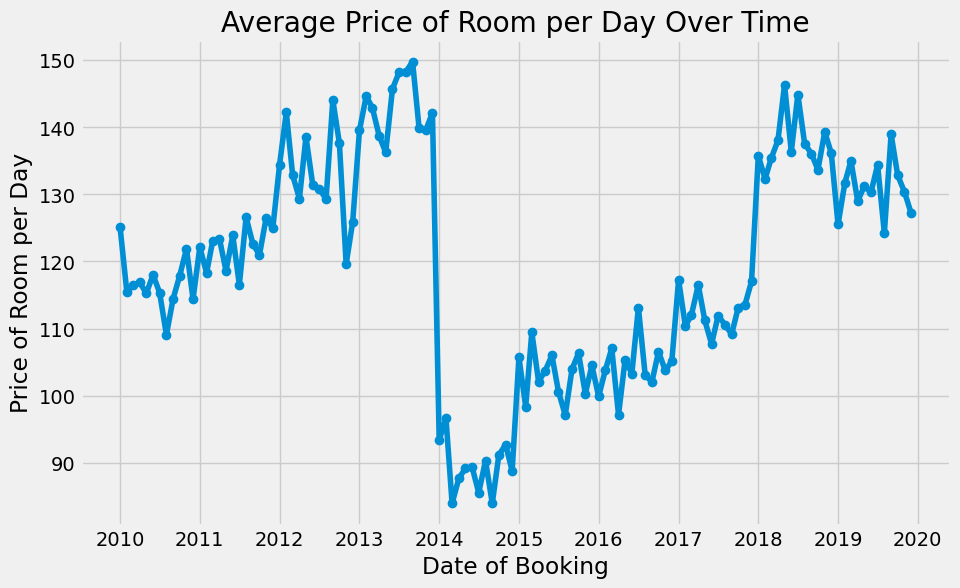

In [486]:
import matplotlib.pyplot as plt

# Convert PeriodIndex to DatetimeIndex
average_price_monthly_df.index = average_price_monthly_df.index.to_timestamp()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(average_price_monthly_df.index, average_price_monthly_df['Price of Room per Day'], marker='o', linestyle='-')
plt.title('Average Price of Room per Day Over Time')
plt.xlabel('Date of Booking')
plt.ylabel('Price of Room per Day')
plt.grid(True)
plt.show()

In [487]:
##Checking for missing values

average_price_monthly_df.isnull().sum() 

Price of Room per Day    0
dtype: int64

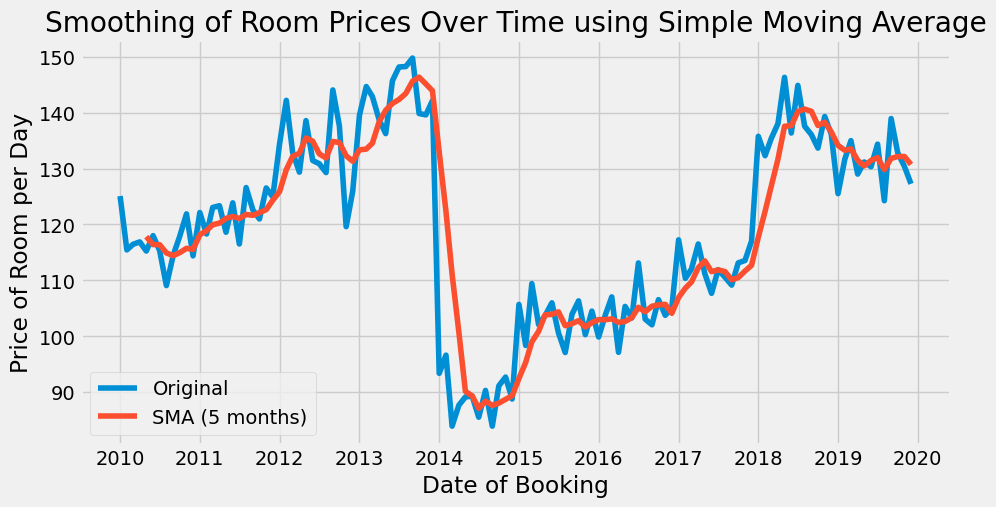

In [488]:

# Simple Moving Average (SMA)
window_size = 5  # Adjust the window size as needed
sma = average_price_monthly_df['Price of Room per Day'].rolling(window=window_size).mean()

# Plotting the original and smoothed data
plt.figure(figsize=(10, 5))
plt.plot(average_price_monthly_df['Price of Room per Day'], label='Original')
plt.plot(sma, label=f'SMA ({window_size} months)')
plt.title('Smoothing of Room Prices Over Time using Simple Moving Average')
plt.xlabel('Date of Booking')
plt.ylabel('Price of Room per Day')
plt.legend()
plt.show()

In [489]:
## Smoothned with simple moving average for 5 months shows the data set more smoothned and less noise

In [490]:
sma = average_price_monthly_df['Price of Room per Day'].rolling(window=10).mean()

# Drop rows with missing values
sma = sma.dropna()

# <span style="font-size:16px; color:Black;">Time series analysis decomposition</span>

In [491]:
## Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sma, model='additive')

In [492]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

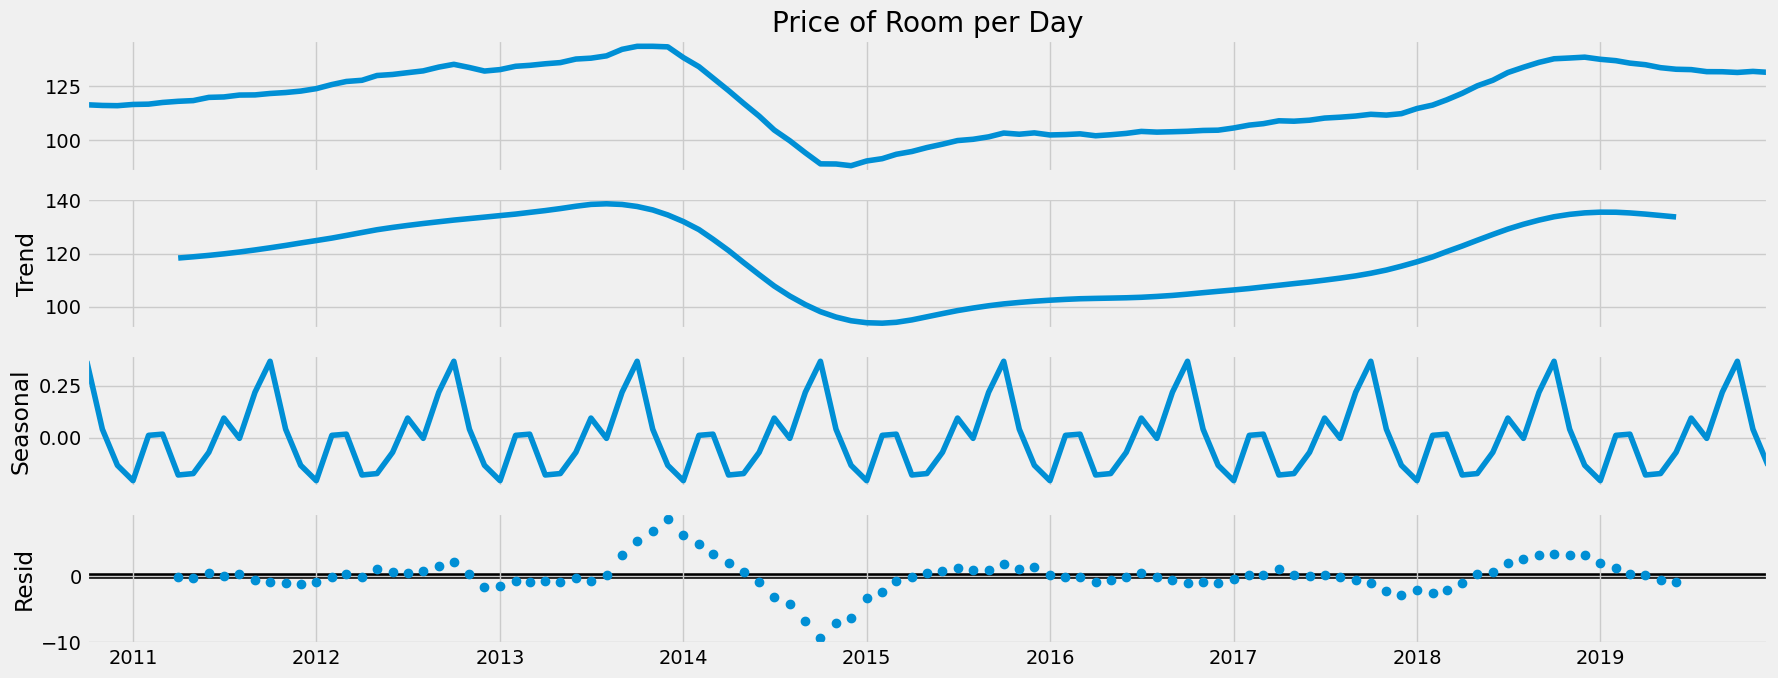

In [493]:
# Plot the separate components

decomposition.plot()
plt.show()

#  <span style="font-size:16px; color:Black;">As working with smoothned data trend and level are almost the same, which emphasis that there is less noice. Overall trend seems to be that price per room per day is increasing  despite of steap drop between years 2014 & 2015  and after 2019 it agains show slow decline. Need to conduct firther research for global events which could result for 2014 decrease and 2019 would be the start of Covid 19 pandemic </span>

#  <span style="font-size:16px; color:Black;">And each year we could see seaonality in the data set</span>

#  <span style="font-size:16px; color:Black;">Apart from 2014  there is not much of noice</span>


# <span style="font-size:16px; color:Black;"> Testing for stationarity</span>


In [494]:
## dickey_fuller test for smoothned data

result = adfuller(sma)  # Perform the test on the SMA series
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -2.6545162548605568
p-value: 0.08224500896415043
Critical Values: {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}


# <span style="font-size:16px; color:Black;"> Since critical value is less than test statistics it implies that rooth data is non stationary. </span>

# <span style="font-size:16px; color:Black;"> Check out the plot for auto correlation. </span>

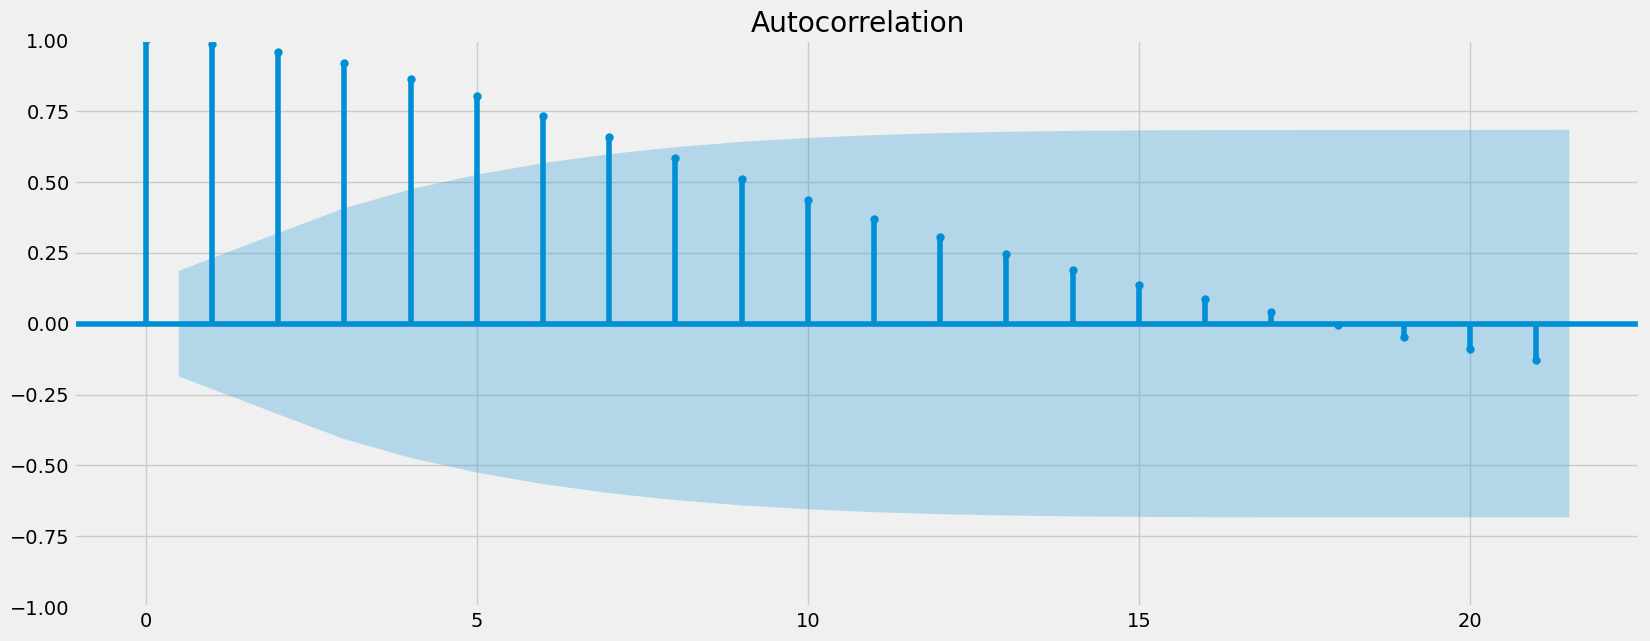

In [495]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sma)
plt.show()

# <span style="font-size:16px; color:Black;"> Since around 33% of all data are outside the significant area, data will be firther stationarized. </span>

# <span style="font-size:16px; color:Black;"> Stationarizing data. </span>

In [496]:
data_diff = sma - sma.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [497]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [498]:
data_diff.head()

Date of Booking
2010-11-01   -0.318549
2010-12-01   -0.106233
2011-01-01    0.569128
2011-02-01    0.141643
2011-03-01    0.779533
Freq: MS, Name: Price of Room per Day, dtype: float64

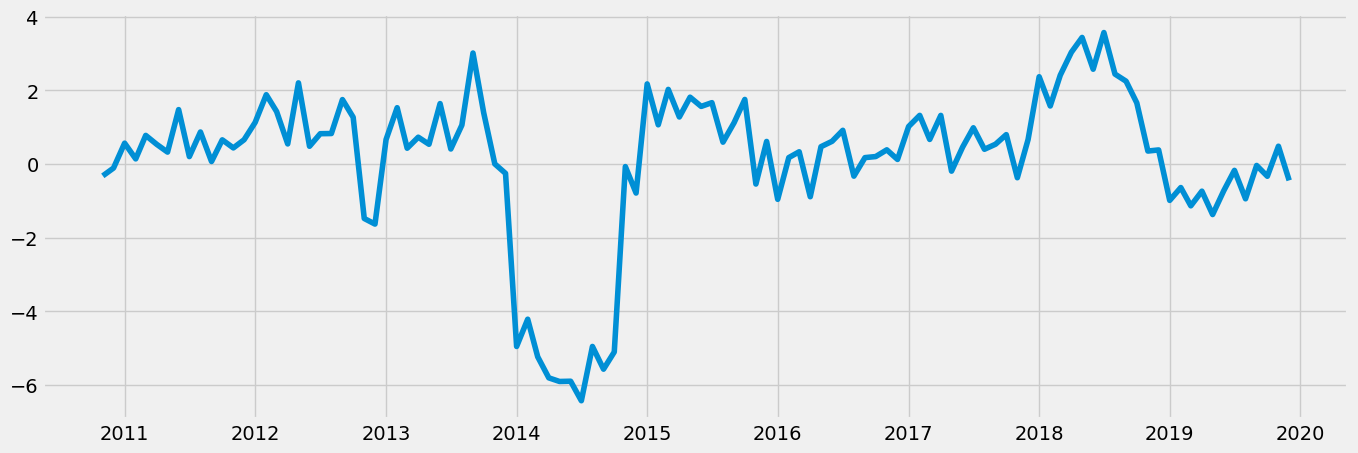

In [502]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [500]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.697244
p-value                         0.432533
Number of Lags Used            12.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


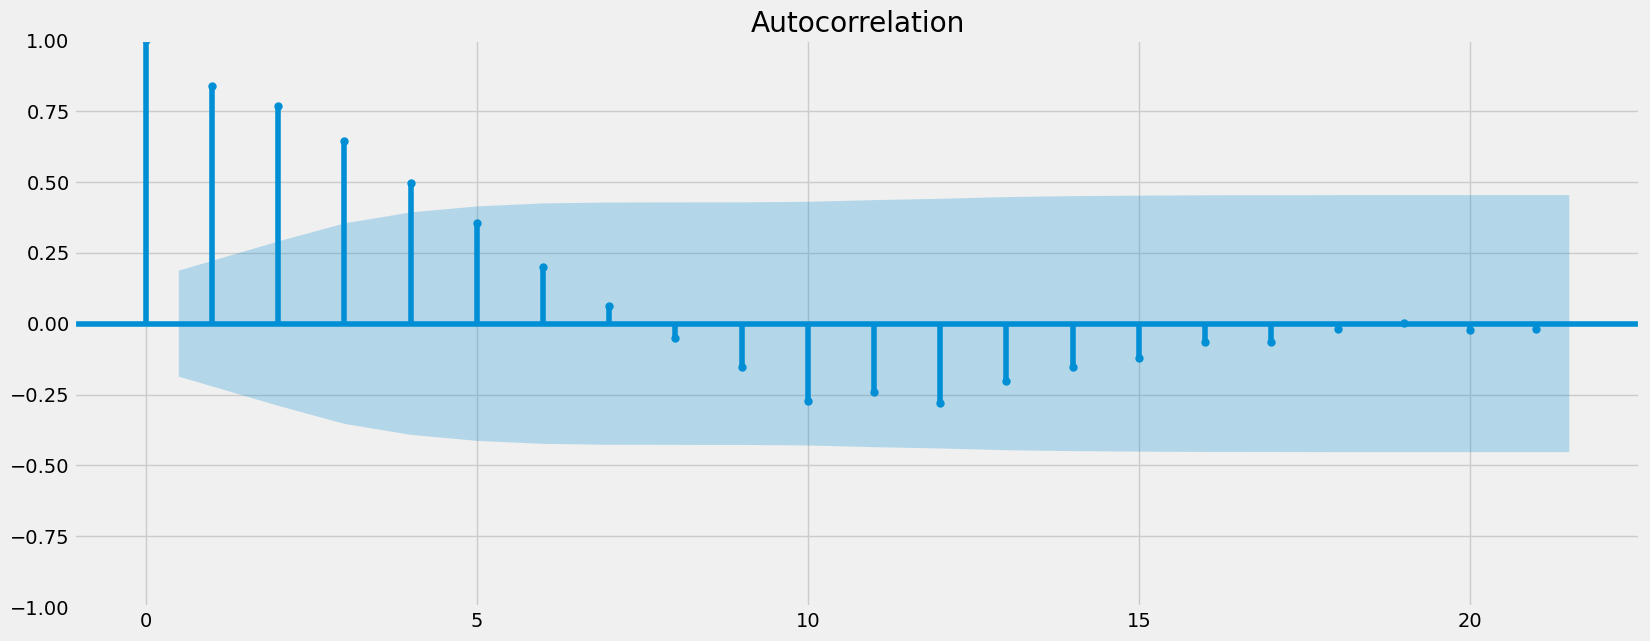

In [501]:
plot_acf(data_diff)
plt.show()

In [503]:
## Second round statioanarizing data

data_diff_1 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [507]:
data_diff_1.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [508]:
data_diff_1.head()

Date of Booking
2010-12-01    0.212316
2011-01-01    0.675361
2011-02-01   -0.427485
2011-03-01    0.637891
2011-04-01   -0.244441
Freq: MS, Name: Price of Room per Day, dtype: float64

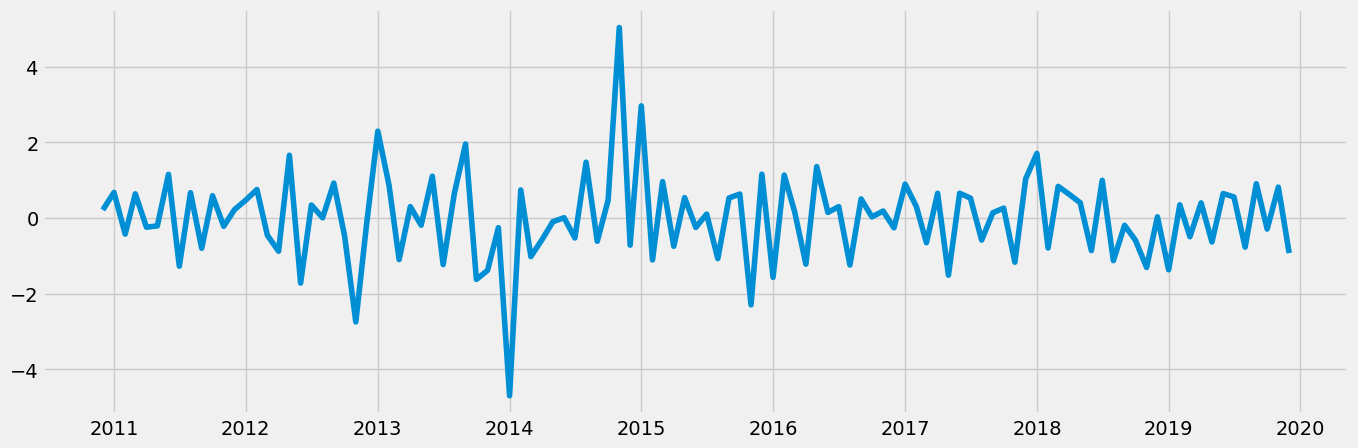

In [509]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_1)

In [510]:
dickey_fuller(data_diff_1)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.391238
p-value                         0.000004
Number of Lags Used            11.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


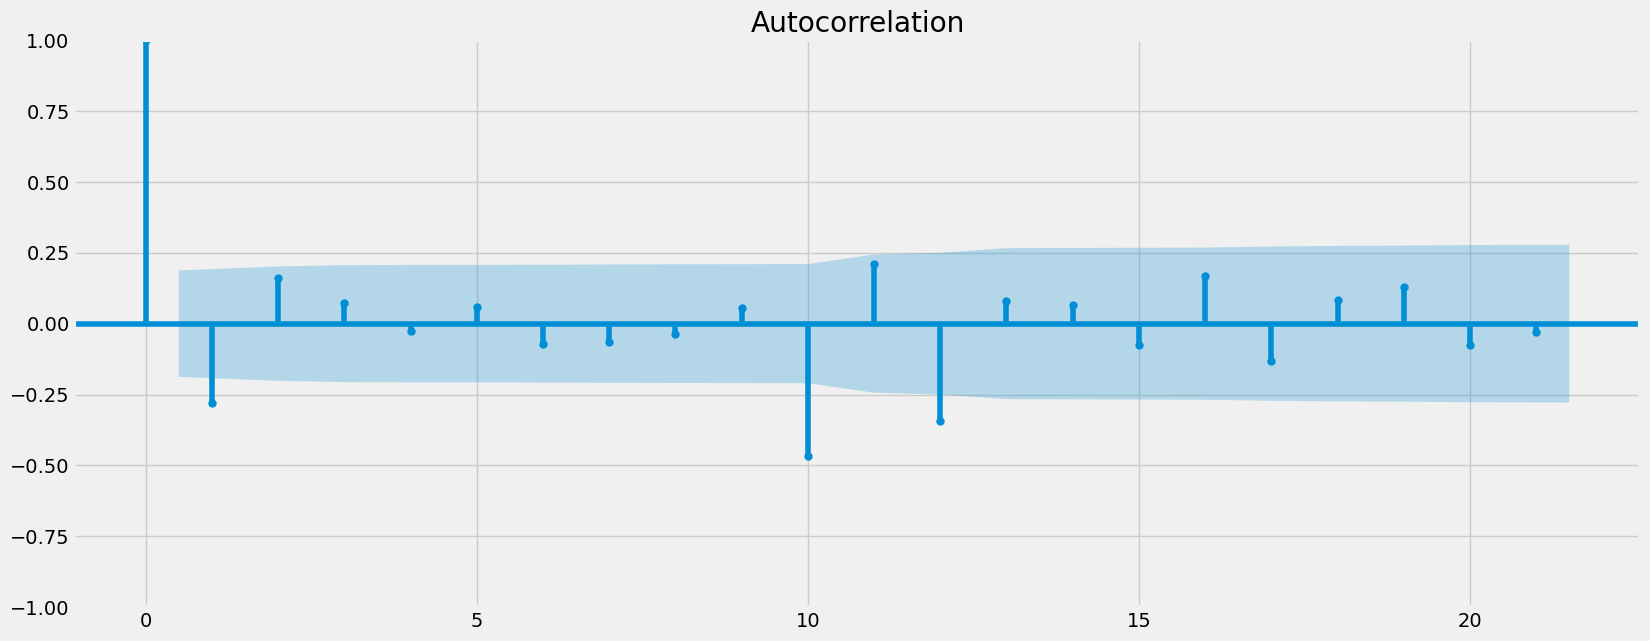

In [511]:
plot_acf(data_diff_1)
plt.show()

# <span style="font-size:16px; color:Black;"> Now both Dickeyfuller test and autocorrelation indicates that data is stationary and strong </span>